# CI Bioenergy Cost Map Analysis

This notebook visualises the total cooking energy cost per district in Côte d’Ivoire for the year 2030 under the BAU scenario.

Steps:
1. Load the administrative boundary shapefile (ADM1)
2. Load the scenario results
3. Merge spatial and cost data
4. Plot a choropleth map

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Load GPKG with district geometries
gadm_path = "gadm/gadm41_CIV.gpkg"
adm1 = gpd.read_file(gadm_path, layer="ADM_ADM_1")
adm1.head()


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,CIV.1_1,CIV,Côte d'Ivoire,Abidjan,NA,NA,District autonome,Autonomous district,NA,CI.AB,CI-AB,"MULTIPOLYGON (((-3.82406 5.3753, -3.82136 5.37..."
1,CIV.2_1,CIV,Côte d'Ivoire,Bas-Sassandra,NA,NA,District,District,NA,CI.BA,CI-BS,"MULTIPOLYGON (((-7.22097 4.5007, -7.22125 4.50..."
2,CIV.3_1,CIV,Côte d'Ivoire,Comoé,NA,NA,District,District,NA,CI.CM,NA,"MULTIPOLYGON (((-2.72485 5.34208, -2.72569 5.3..."
3,CIV.4_1,CIV,Côte d'Ivoire,Denguélé,NA,NA,District,District,NA,CI.DE,NA,"MULTIPOLYGON (((-7.1264 9.02526, -7.13351 9.01..."
4,CIV.5_1,CIV,Côte d'Ivoire,Gôh-Djiboua,NA,NA,District,District,NA,CI.GD,NA,"MULTIPOLYGON (((-5.59395 5.52905, -5.61138 5.5..."


In [6]:
# Load summary results for 2030, BAU scenario
results_path = "results/ci_bioenergy_techpathways.xlsx"
summary = pd.read_excel(results_path, sheet_name="Summary")

df = summary[(summary["Year"] == 2030) & (summary["Scenario"] == "bau")][["Region", "Total_Cost_USD"]]
df.head()


,Region,Total_Cost_USD
0,Abidjan,43197833.42
1,Agnéby-Tiassa,5669162.05
2,Béré,2228064.05
3,Cavally,3470491.70
4,Gbêkê,6377788.73


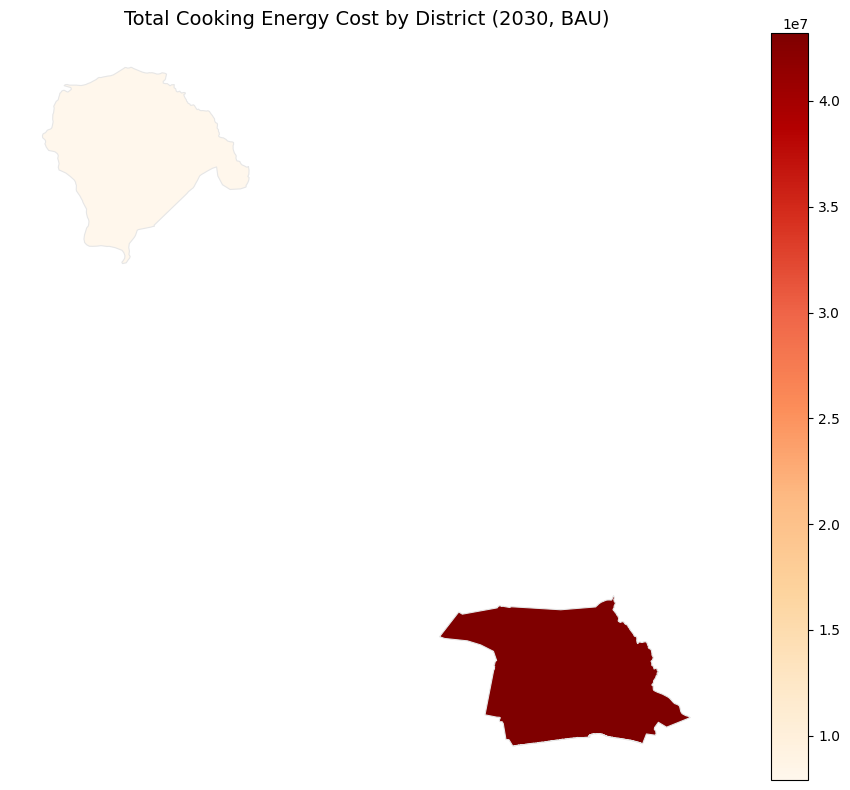

In [7]:
# Merge spatial and cost data
merged = adm1.merge(df, how="left", left_on="NAME_1", right_on="Region")

# Plot choropleth map
fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(column="Total_Cost_USD", cmap="OrRd", linewidth=0.8, edgecolor="0.9", legend=True, ax=ax)
ax.set_title("Total Cooking Energy Cost by District (2030, BAU)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()


Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')

In [8]:
# Check which districts were matched
matched = merged[merged["Total_Cost_USD"].notna()]
unmatched = merged[merged["Total_Cost_USD"].isna()]

print("✅ Matched:", matched["NAME_1"].tolist())
print("❌ Unmatched:", unmatched["NAME_1"].tolist())

✅ Matched: ['Abidjan', 'Yamoussoukro']
❌ Unmatched: ['Bas-Sassandra', 'Comoé', 'Denguélé', 'Gôh-Djiboua', 'Lacs', 'Lagunes', 'Montagnes', 'Sassandra-Marahoué', 'Savanes', 'Vallée du Bandama', 'Woroba', 'Zanzan']


In [9]:
df["Region"].unique()

array(['Abidjan', 'Agnéby-Tiassa', 'Béré', 'Cavally', 'Gbêkê', 'Guémon',
       'Gôh', 'Hambol', 'Haut-Sassandra', 'San Pedro', 'Sud-Comoé',
       'Yamoussoukro'], dtype=object)

In [17]:
summary["Region"].unique()

array(['Abidjan', 'Agnéby-Tiassa', 'Béré', 'Cavally', 'Gbêkê', 'Guémon',
       'Gôh', 'Hambol', 'Haut-Sassandra', 'San-Pédro', 'Sud-Comoé',
       'Yamoussoukro'], dtype=object)

In [18]:
print("✅ Matched:", merged[merged["Total_Cost_USD"].notna()]["NAME_1"].tolist())
print("❌ Unmatched:", merged[merged["Total_Cost_USD"].isna()]["NAME_1"].tolist())

✅ Matched: ['Abidjan', 'Yamoussoukro']
❌ Unmatched: ['Bas-Sassandra', 'Comoé', 'Denguélé', 'Gôh-Djiboua', 'Lacs', 'Lagunes', 'Montagnes', 'Sassandra-Marahoué', 'Savanes', 'Vallée du Bandama', 'Woroba', 'Zanzan']


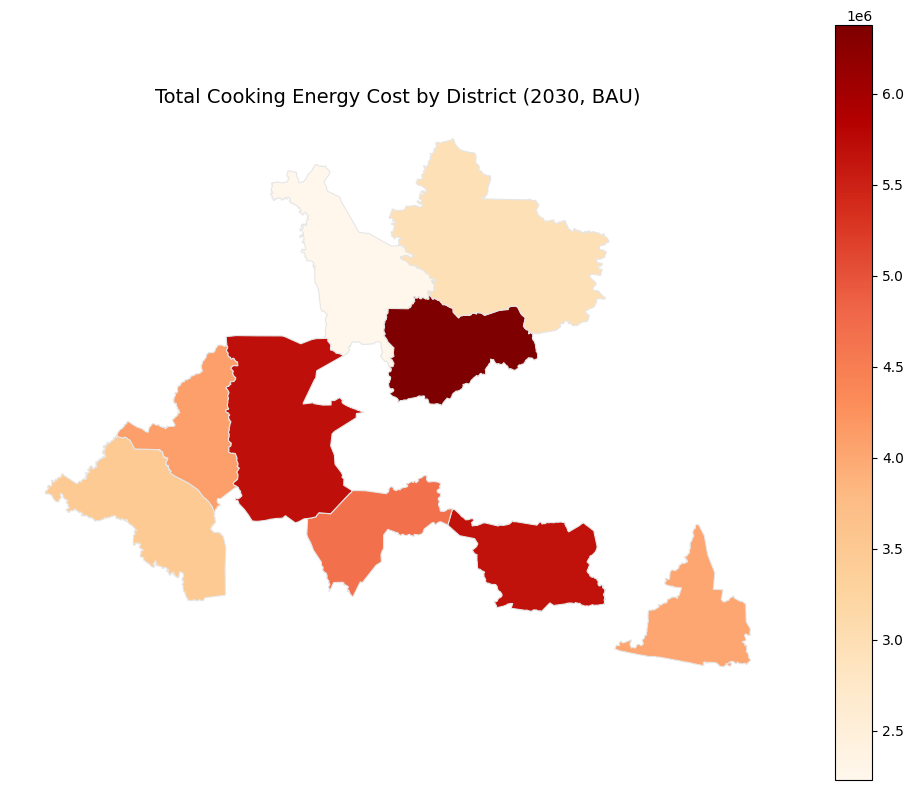

In [22]:
import geopandas as gpd
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt

def normalize(s):
    return unicodedata.normalize('NFKD', s).encode('ascii', errors='ignore').decode().lower().strip()

# Load ADM2 shapefile
adm2 = gpd.read_file("civ_adm2_shapes/geoBoundaries-CIV-ADM2.shp")

# Load model results
summary = pd.read_excel("results/ci_bioenergy_techpathways.xlsx", sheet_name="Summary")
df = summary[(summary["Year"] == 2030) & (summary["Scenario"] == "bau")][["Region", "Total_Cost_USD"]]

# Normalize names for merging
adm2["name_clean"] = adm2["shapeName"].apply(normalize)
df["region_clean"] = df["Region"].apply(normalize)

# Merge spatial and cost data
merged = adm2.merge(df, how="left", left_on="name_clean", right_on="region_clean")

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(column="Total_Cost_USD", cmap="OrRd", linewidth=0.8, edgecolor="0.9", legend=True, ax=ax)
ax.set_title("Total Cooking Energy Cost by District (2030, BAU)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

In [21]:
adm2 = gpd.read_file("civ_adm2_shapes/geoBoundaries-CIV-ADM2.shp")
